# First try of 10 fold cross-validation with a simple neural network

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.callbacks import EarlyStopping

In [11]:
#extracting data from csv files into numpy arrays
from numpy import genfromtxt
files_data=np.array(['fold_data_1.csv','fold_data_2.csv','fold_data_3.csv','fold_data_4.csv','fold_data_5.csv',
                'fold_data_6.csv','fold_data_7.csv','fold_data_8.csv','fold_data_9.csv','fold_data_10.csv'])
X_folds= np.array([genfromtxt(file,delimiter=',') for file in files_data])

files_label=(['fold_labels_1.csv','fold_labels_2.csv','fold_labels_3.csv','fold_labels_4.csv','fold_labels_5.csv',
                'fold_labels_6.csv','fold_labels_7.csv','fold_labels_8.csv','fold_labels_9.csv','fold_labels_10.csv'])
Y_folds= np.array([genfromtxt(file,delimiter=',') for file in files_label])

In [3]:
# Reshaping Y_folds (Note: NOT for CNN)
for i in range(0, len(Y_folds)):
    Y_folds[i]=np.reshape(Y_folds[i],(Y_folds[i].shape[0], 1))

In [12]:
# Changing the labels into categorical (Note: ONLY for CNN)
from keras.utils.np_utils import to_categorical
Y_folds=([to_categorical(Y_folds, num_classes=10) for Y_folds in Y_folds])

In [4]:
# Reshaping folds
for i in range(0, len(X_folds)):
    X_folds[i]=np.reshape(X_folds[i],(X_folds[i].shape[0], 40, 6))

In [5]:
# 10 fold cross-validation
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
    
accuracy_scores = []

accuracy_history = []
loss_history = []
val_accuracy_history = []
val_loss_history = []

fold = 0
for i in range (0, len(Y_folds)) :
    fold+=1
    print(f"Fold #{fold}")
    
    x_train = np.vstack([X_folds[j] for j in range(0, len(Y_folds)) if i!=j])
    y_train = np.vstack([Y_folds[j] for j in range(0, len(Y_folds)) if i!=j])
    x_test = np.vstack([X_folds[j] for j in range(0, len(Y_folds)) if i==j])
    y_test = np.vstack([Y_folds[j] for j in range(0, len(Y_folds)) if i==j])
    print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
    
    model = Sequential()
    model.add(Flatten(input_shape=[40, 6]))
    model.add(Dense(300, activation="relu"))   
    model.add(Dense(100, activation="relu"))
    model.add(Dense(10, activation="softmax"))
    model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics = ["accuracy"])
#     Storing the history
    fitting_data = model.fit(x_train,y_train,batch_size=50,epochs=30,validation_data=(x_test,y_test), verbose=0)
    accuracy_history.append(fitting_data.history['acc'])
    loss_history.append(fitting_data.history['loss'])
    val_accuracy_history.append(fitting_data.history['val_acc'])
    val_loss_history.append(fitting_data.history['val_loss'])
    model_evaluation = model.evaluate(x_test, y_test, verbose = 0)
    score = model_evaluation[1]
    accuracy_scores.append(score)
    print("Fold score (Accuracy): {score}".format(score = score))

# Build the oos prediction list and calculate the error.
final_score = np.mean(accuracy_scores)
print(f"Final, out of sample score (Accuracy): {final_score}")  

Fold #1
(7859, 40, 6) (7859, 1) (873, 40, 6) (873, 1)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








Fold score (Accuracy): 0.14776632302405499
Fold #2
(7844, 40, 6) (7844, 1) (888, 40, 6) (888, 1)
Fold score (Accuracy): 0.11261261261261261
Fold #3
(7807, 40, 6) (7807, 1) (925, 40, 6) (925, 1)
Fold score (Accuracy): 0.10810810810810811
Fold #4
(7742, 40, 6) (7742, 1) (990, 40, 6) (990, 1)
Fold score (Accuracy): 0.10101010101010101
Fold #5
(7796, 40, 6) (7796, 1) (936, 40, 6) (936, 1)
Fold score (Accuracy): 0.10683760683760683
Fold #6
(7909, 40, 6) (7909, 1) (823, 40, 6) (823, 1)
Fold score (Accuracy): 0.13730255164034022
Fold #7
(7894, 40, 6) (7894, 1) (838, 40, 6) (838, 1)
Fold score (Accuracy): 0.11933174224343675
Fold #8
(7926, 40, 6) (7926, 1) (806, 40, 6) (806, 1)
Fold score (Accuracy): 0.0967741935483871
Fold #9
(7916, 40, 6) (7916, 1) (816, 40, 6) (816, 1)
Fold score (Accuracy): 0.12254901960784313
Fold #10
(7895, 40, 6

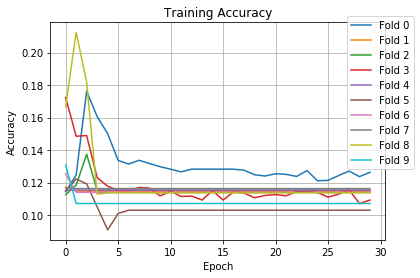

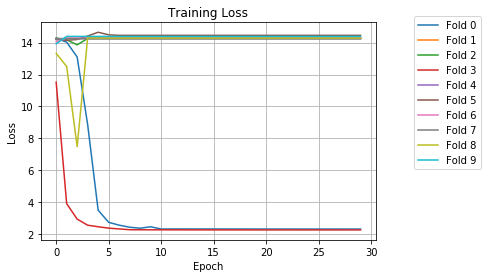

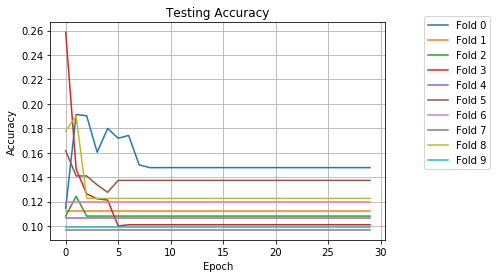

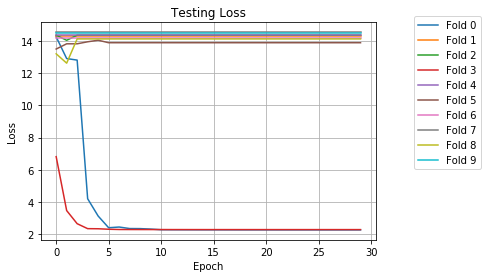

In [6]:
# Visualise loss/accuracy during training and testing separately
import matplotlib.pyplot as plt

for i in range(0,10):
    plt.plot(accuracy_history[i])
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Fold {}'.format(j) for j in range (0,10)], bbox_to_anchor=(1.1, 1.05))
plt.grid()
plt.show()

for i in range(0,10):
    plt.plot(loss_history[i])
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Fold {}'.format(j) for j in range (0,10)], bbox_to_anchor=(1.1, 1.05))
plt.grid()
plt.show()

for i in range(0,10):
    plt.plot(val_accuracy_history[i])
plt.title('Testing Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Fold {}'.format(j) for j in range (0,10)], bbox_to_anchor=(1.1, 1.05))
plt.grid()
plt.show()

for i in range(0,10):
    plt.plot(val_loss_history[i])
plt.title('Testing Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Fold {}'.format(j) for j in range (0,10)], bbox_to_anchor=(1.1, 1.05))
plt.grid()
plt.show()

# 10 fold cross-validation for a Convolutional Neural Network

In [13]:
# Reshaping folds for CNN
for i in range(0, len(X_folds)):
    X_folds[i]=np.reshape(X_folds[i],(X_folds[i].shape[0], 40, 6, 1))

In [24]:
# 10 fold cross-validation
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import KFold
    
accuracy_scores = []

accuracy_history = []
loss_history = []
val_accuracy_history = []
val_loss_history = []

fold = 0
for i in range (0, len(Y_folds)) :
    fold+=1
    print(f"Fold #{fold}")
    
    x_train = np.vstack([X_folds[j] for j in range(0, len(Y_folds)) if i!=j])
    y_train = np.vstack([Y_folds[j] for j in range(0, len(Y_folds)) if i!=j])
    x_test = np.vstack([X_folds[j] for j in range(0, len(Y_folds)) if i==j])
    y_test = np.vstack([Y_folds[j] for j in range(0, len(Y_folds)) if i==j])
    
    #forming model
    model=Sequential()

    model.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(40,6,1)))
    model.add(MaxPooling2D(padding="same"))

    model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
    model.add(MaxPooling2D(padding="same"))
    model.add(Dropout(0.3))

    model.add(Flatten())

    model.add(Dense(256,activation="relu"))
    model.add(Dropout(0.3))

    model.add(Dense(512,activation="relu"))
    model.add(Dropout(0.3))

    model.add(Dense(10,activation="softmax"))

    #compiling
    model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

    #training the model
    #Storing the history
    fitting_data = model.fit(x_train,y_train,batch_size=50,epochs=30, verbose = 0,validation_data=(x_test,y_test))
    
    accuracy_history.append(fitting_data.history['acc'])
    loss_history.append(fitting_data.history['loss'])
    val_accuracy_history.append(fitting_data.history['val_acc'])
    val_loss_history.append(fitting_data.history['val_loss'])
    
    model_evaluation = model.evaluate(x_test, y_test, verbose = 0)
    score = model_evaluation[1]
    accuracy_scores.append(score)
    print("Fold score (Accuracy): {score}".format(score = score))

# Build the oos prediction list and calculate the error.
final_score = np.mean(accuracy_scores)
print(f"Final, out of sample score (Accuracy): {final_score}") 

Fold #1


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Fold score (Accuracy): 0.6231386025883214
Fold #2
Fold score (Accuracy): 0.11486486486486487
Fold #3
Fold score (Accuracy): 0.4583783785716907
Fold #4
Fold score (Accuracy): 0.3575757578165844
Fold #5
Fold score (Accuracy): 0.10683760683760683
Fold #6
Fold score (Accuracy): 0.4507897932937919
Fold #7
Fold score (Accuracy): 0.360381861575179
Fold #8
Fold score (Accuracy): 0.34863523573200994
Fold #9
Fold score (Accuracy): 0.6470588235294118
Fold #10
Fold score (Accuracy): 0.1111111111111111
Final, out of sample score (Accuracy): 0.3578772035920572


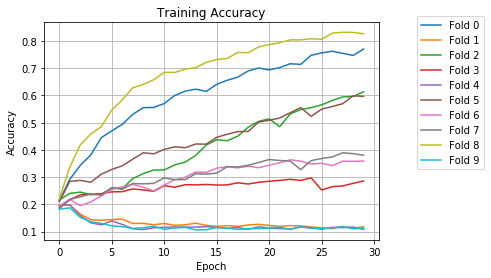

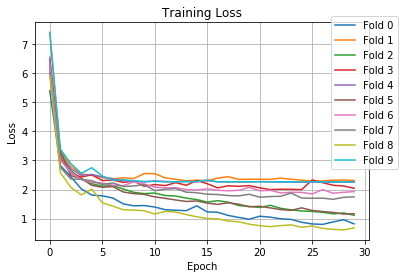

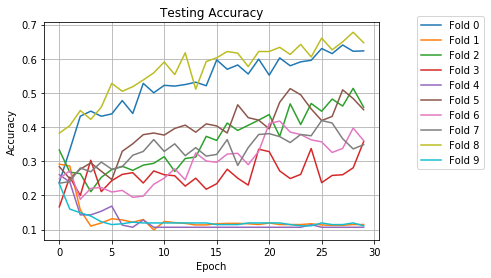

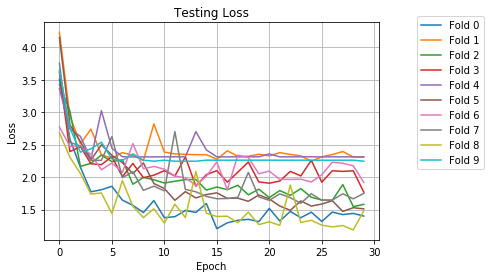

In [25]:
# Visualise loss/accuracy during training and testing separately
import matplotlib.pyplot as plt

for i in range(0,10):
    plt.plot(accuracy_history[i])
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Fold {}'.format(j) for j in range (0,10)], bbox_to_anchor=(1.1, 1.05))
plt.grid()
plt.show()

for i in range(0,10):
    plt.plot(loss_history[i])
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Fold {}'.format(j) for j in range (0,10)], bbox_to_anchor=(1.1, 1.05))
plt.grid()
plt.show()

for i in range(0,10):
    plt.plot(val_accuracy_history[i])
plt.title('Testing Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Fold {}'.format(j) for j in range (0,10)], bbox_to_anchor=(1.1, 1.05))
plt.grid()
plt.show()

for i in range(0,10):
    plt.plot(val_loss_history[i])
plt.title('Testing Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Fold {}'.format(j) for j in range (0,10)], bbox_to_anchor=(1.1, 1.05))
plt.grid()
plt.show()

# Creating a CNN from scratch (no cross-validation) 

In [15]:
Y_folds[0].shape, X_folds[0].shape 

((873, 10), (873, 40, 6, 1))

In [32]:
X_train = np.vstack([X_folds[j] for j in range(0, len(Y_folds)-1)])
y_train = np.vstack([Y_folds[j] for j in range(0, len(Y_folds)-1)])
X_test = X_folds[9]
y_test = Y_folds[9]


early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(40,6,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#train the model
cnn_model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, callbacks=[early_stopping_cb])
model.evaluate(X_test, y_test)

Train on 7895 samples, validate on 837 samples
Epoch 1/30
7895/7895 [==============================] - 5s 612us/step - loss: 4.4086 - acc: 0.4238 - val_loss: 3.0895 - val_acc: 0.4827
Epoch 2/30
7895/7895 [==============================] - 3s 367us/step - loss: 2.6515 - acc: 0.6279 - val_loss: 2.5758 - val_acc: 0.5842
Epoch 3/30
7895/7895 [==============================] - 3s 369us/step - loss: 2.3963 - acc: 0.6782 - val_loss: 1.8610 - val_acc: 0.6703
Epoch 4/30
7895/7895 [==============================] - 3s 382us/step - loss: 1.9234 - acc: 0.7272 - val_loss: 2.3063 - val_acc: 0.6356
Epoch 5/30
7895/7895 [==============================] - 3s 390us/step - loss: 1.8490 - acc: 0.7502 - val_loss: 1.9313 - val_acc: 0.6607
Epoch 6/30
7895/7895 [==============================] - 3s 396us/step - loss: 1.3631 - acc: 0.8009 - val_loss: 1.8851 - val_acc: 0.6655
Epoch 7/30
7895/7895 [==============================] - 3s 390us/step - loss: 0.9446 - acc: 0.8374 - val_loss: 1.7764 - val_acc: 0.6679
E

[1.748113632611619, 0.6487455197132617]

In [4]:
# Reshaping folds for CNN
for i in range(0, len(X_folds)):
    X_folds[i]=np.reshape(X_folds[i],(X_folds[i].shape[0], 40, 6, 1))

In [6]:
# 10 fold cross-validation
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import KFold
    
accuracy_scores = []

accuracy_history = []
loss_history = []
val_accuracy_history = []
val_loss_history = []

fold = 0
for i in range (0, len(Y_folds)) :
    fold+=1
    print(f"Fold #{fold}")
    
    x_train = np.vstack([X_folds[j] for j in range(0, len(Y_folds)) if i!=j])
    y_train = np.vstack([Y_folds[j] for j in range(0, len(Y_folds)) if i!=j])
    x_test = np.vstack([X_folds[j] for j in range(0, len(Y_folds)) if i==j])
    y_test = np.vstack([Y_folds[j] for j in range(0, len(Y_folds)) if i==j])
    
    #forming model
    model=Sequential()
    early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)

    #add model layers
    model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(40,6,1)))
    model.add(Conv2D(32, kernel_size=3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    #compile model using accuracy to measure model performance
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    #training the model
    #Storing the history
    fitting_data = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, callbacks=[early_stopping_cb])
    
    accuracy_history.append(fitting_data.history['acc'])
    loss_history.append(fitting_data.history['loss'])
    val_accuracy_history.append(fitting_data.history['val_acc'])
    val_loss_history.append(fitting_data.history['val_loss'])
    
    model_evaluation = model.evaluate(x_test, y_test, verbose = 0)
    score = model_evaluation[1]
    accuracy_scores.append(score)
    print("Fold score (Accuracy): {score}".format(score = score))

# Build the oos prediction list and calculate the error.
final_score = np.mean(accuracy_scores)
print(f"Final, out of sample score (Accuracy): {final_score}") 

Fold #1
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7859 samples, validate on 873 samples
Epoch 1/50





7859/7859 [==============================] - 4s 552us/step - loss: 4.2067 - acc: 0.4392 - val_loss: 4.3882 - val_acc: 0.4387
Epoch 2/50
7859/7859 [==============================] - 3s 398us/step - loss: 2.9900 - acc: 0.6101 - val_loss: 3.5808 - val_acc: 0.4834
Epoch 3/50
7859/7859 [==============================] - 3s 402us/step - loss: 2.6873 - acc: 0.6589 - val_loss: 3.0645 - val_acc: 0.4914
Epoch 4/50
7859/7859 [==============================] - 3s 363us/step - loss: 2.0698 - acc: 0.7067 - val_loss: 2.9758 - val_acc: 0.4891
Epoch 5/50
7859/7859 [==============================] - 3s 375us/step - loss: 1.6767 - acc: 0.7553 - val_loss: 2.5775 - val_acc: 0.5601
Epoch 6/50
7859/7859 [==============================] - 3s 375us/step - loss: 1.3992 - acc: 0.7912 - val_loss: 2.7301 - val_acc: 0.5601
Epoch 7/50
7859/7859 [=====

Epoch 12/50
7807/7807 [==============================] - 3s 385us/step - loss: 0.4077 - acc: 0.8851 - val_loss: 1.6237 - val_acc: 0.5449
Epoch 13/50
7807/7807 [==============================] - 3s 391us/step - loss: 0.3829 - acc: 0.8946 - val_loss: 1.7051 - val_acc: 0.5135
Epoch 14/50
7807/7807 [==============================] - 3s 385us/step - loss: 0.3614 - acc: 0.8965 - val_loss: 1.7500 - val_acc: 0.5362
Epoch 15/50
7807/7807 [==============================] - 3s 385us/step - loss: 0.3226 - acc: 0.9093 - val_loss: 1.7113 - val_acc: 0.5503
Epoch 16/50
7807/7807 [==============================] - 3s 388us/step - loss: 0.3388 - acc: 0.9073 - val_loss: 1.8962 - val_acc: 0.5038
Epoch 17/50
7807/7807 [==============================] - 3s 384us/step - loss: 0.2842 - acc: 0.9216 - val_loss: 1.6451 - val_acc: 0.5805
Epoch 18/50
7807/7807 [==============================] - 3s 392us/step - loss: 0.2567 - acc: 0.9253 - val_loss: 2.3046 - val_acc: 0.5189
Epoch 19/50
7807/7807 [==================

Epoch 10/50
7909/7909 [==============================] - 3s 386us/step - loss: 0.3984 - acc: 0.8938 - val_loss: 1.8437 - val_acc: 0.6136
Epoch 11/50
7909/7909 [==============================] - 3s 392us/step - loss: 0.3375 - acc: 0.8983 - val_loss: 1.8711 - val_acc: 0.5844
Epoch 12/50
7909/7909 [==============================] - 3s 399us/step - loss: 0.3015 - acc: 0.9125 - val_loss: 1.8262 - val_acc: 0.6173
Epoch 13/50
7909/7909 [==============================] - 3s 386us/step - loss: 0.2488 - acc: 0.9270 - val_loss: 1.9699 - val_acc: 0.6039
Epoch 14/50
7909/7909 [==============================] - 3s 398us/step - loss: 0.2563 - acc: 0.9238 - val_loss: 1.8673 - val_acc: 0.6185
Epoch 15/50
7909/7909 [==============================] - 3s 392us/step - loss: 0.2573 - acc: 0.9208 - val_loss: 2.2790 - val_acc: 0.5869
Epoch 16/50
7909/7909 [==============================] - 3s 395us/step - loss: 0.2589 - acc: 0.9188 - val_loss: 1.9657 - val_acc: 0.6027
Fold score (Accuracy): 0.6002430134381588

Epoch 13/50
7916/7916 [==============================] - 3s 390us/step - loss: 0.3650 - acc: 0.9059 - val_loss: 2.1407 - val_acc: 0.6544
Epoch 14/50
7916/7916 [==============================] - 3s 391us/step - loss: 0.3796 - acc: 0.9027 - val_loss: 1.8458 - val_acc: 0.6360
Epoch 15/50
7916/7916 [==============================] - 3s 391us/step - loss: 0.2314 - acc: 0.9308 - val_loss: 1.9943 - val_acc: 0.6458
Epoch 16/50
7916/7916 [==============================] - 3s 387us/step - loss: 0.2122 - acc: 0.9351 - val_loss: 2.0084 - val_acc: 0.6556
Epoch 17/50
7916/7916 [==============================] - 3s 389us/step - loss: 0.1857 - acc: 0.9423 - val_loss: 2.1535 - val_acc: 0.6360
Epoch 18/50
7916/7916 [==============================] - 3s 391us/step - loss: 0.1960 - acc: 0.9402 - val_loss: 2.3024 - val_acc: 0.6532
Fold score (Accuracy): 0.6384803921568627
Fold #10
Train on 7895 samples, validate on 837 samples
Epoch 1/50
7895/7895 [==============================] - 5s 584us/step - loss: 4.

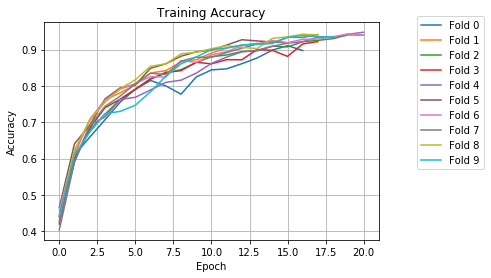

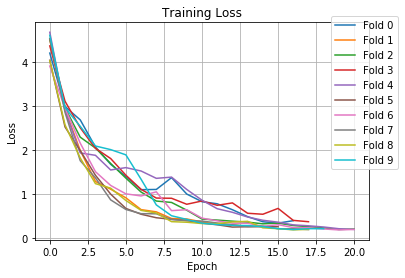

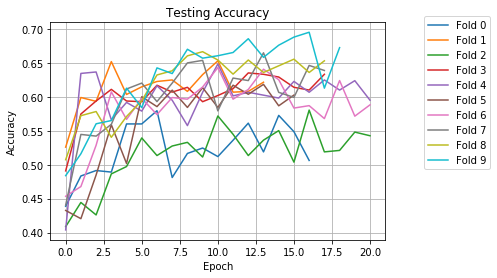

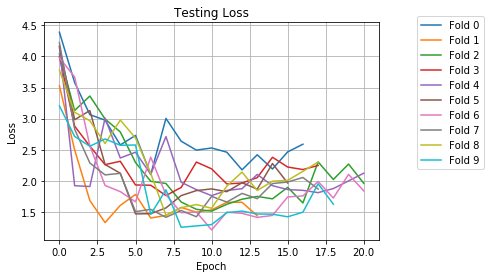

In [7]:
# Visualise loss/accuracy during training and testing separately
import matplotlib.pyplot as plt

for i in range(0,10):
    plt.plot(accuracy_history[i])
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Fold {}'.format(j) for j in range (0,10)], bbox_to_anchor=(1.1, 1.05))
plt.grid()
plt.show()

for i in range(0,10):
    plt.plot(loss_history[i])
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Fold {}'.format(j) for j in range (0,10)], bbox_to_anchor=(1.1, 1.05))
plt.grid()
plt.show()

for i in range(0,10):
    plt.plot(val_accuracy_history[i])
plt.title('Testing Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Fold {}'.format(j) for j in range (0,10)], bbox_to_anchor=(1.1, 1.05))
plt.grid()
plt.show()

for i in range(0,10):
    plt.plot(val_loss_history[i])
plt.title('Testing Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Fold {}'.format(j) for j in range (0,10)], bbox_to_anchor=(1.1, 1.05))
plt.grid()
plt.show()

# Generating a simpler CNN then the approach GitHub's results

### Introducing early stopping

In [15]:
# 10 fold cross-validation
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import KFold
    
accuracy_scores = []

accuracy_history = []
loss_history = []
val_accuracy_history = []
val_loss_history = []

fold = 0
for i in range (0, len(Y_folds)) :
    fold+=1
    print(f"Fold #{fold}")
    
    x_train = np.vstack([X_folds[j] for j in range(0, len(Y_folds)) if i!=j])
    y_train = np.vstack([Y_folds[j] for j in range(0, len(Y_folds)) if i!=j])
    x_test = np.vstack([X_folds[j] for j in range(0, len(Y_folds)) if i==j])
    y_test = np.vstack([Y_folds[j] for j in range(0, len(Y_folds)) if i==j])
    
    #forming model
    model=Sequential()
    early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)

    model.add(Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(40,6,1)))
    model.add(MaxPooling2D(padding="same"))

    model.add(Conv2D(64,kernel_size=5,strides=1,padding="same",activation="relu"))
    model.add(MaxPooling2D(padding="same"))
    model.add(Dropout(0.2))

    model.add(Flatten())

    model.add(Dense(128,activation="relu"))
    model.add(Dropout(0.2))

    model.add(Dense(10,activation="softmax"))

    #compiling
    model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

    #training the model
    #Storing the history
    fitting_data = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, callbacks=[early_stopping_cb])
    
    accuracy_history.append(fitting_data.history['acc'])
    loss_history.append(fitting_data.history['loss'])
    val_accuracy_history.append(fitting_data.history['val_acc'])
    val_loss_history.append(fitting_data.history['val_loss'])
    
    model_evaluation = model.evaluate(x_test, y_test, verbose = 0)
    score = model_evaluation[1]
    accuracy_scores.append(score)
    print("Fold score (Accuracy): {score}".format(score = score))

# Build the oos prediction list and calculate the error.
final_score = np.mean(accuracy_scores)
print(f"Final, out of sample score (Accuracy): {final_score}") 

Fold #1
Train on 7859 samples, validate on 873 samples
Epoch 1/50
7859/7859 [==============================] - 7s 830us/step - loss: 5.1856 - acc: 0.2385 - val_loss: 2.8082 - val_acc: 0.2761
Epoch 2/50
7859/7859 [==============================] - 4s 517us/step - loss: 2.6087 - acc: 0.2608 - val_loss: 2.2354 - val_acc: 0.3299
Epoch 3/50
7859/7859 [==============================] - 4s 533us/step - loss: 2.0988 - acc: 0.2913 - val_loss: 2.1738 - val_acc: 0.3104
Epoch 4/50
7859/7859 [==============================] - 4s 550us/step - loss: 1.9248 - acc: 0.3167 - val_loss: 2.2634 - val_acc: 0.3150
Epoch 5/50
7859/7859 [==============================] - 4s 544us/step - loss: 1.8102 - acc: 0.3528 - val_loss: 2.1989 - val_acc: 0.3265
Epoch 6/50
7859/7859 [==============================] - 4s 554us/step - loss: 1.6901 - acc: 0.3892 - val_loss: 1.9901 - val_acc: 0.4376
Epoch 7/50
7859/7859 [==============================] - 4s 556us/step - loss: 1.6284 - acc: 0.4102 - val_loss: 1.9577 - val_acc: 

7807/7807 [==============================] - 5s 578us/step - loss: 2.3148 - acc: 0.3165 - val_loss: 2.5092 - val_acc: 0.3341
Epoch 5/50
7807/7807 [==============================] - 4s 565us/step - loss: 2.3233 - acc: 0.3414 - val_loss: 2.0724 - val_acc: 0.2897
Epoch 6/50
7807/7807 [==============================] - 4s 572us/step - loss: 2.0557 - acc: 0.3597 - val_loss: 1.9543 - val_acc: 0.3178
Epoch 7/50
7807/7807 [==============================] - 4s 566us/step - loss: 1.8463 - acc: 0.3767 - val_loss: 1.9385 - val_acc: 0.2843
Epoch 8/50
7807/7807 [==============================] - 4s 560us/step - loss: 1.8609 - acc: 0.3470 - val_loss: 1.8009 - val_acc: 0.3157
Epoch 9/50
7807/7807 [==============================] - 4s 570us/step - loss: 1.7215 - acc: 0.3775 - val_loss: 1.7285 - val_acc: 0.3405
Epoch 10/50
7807/7807 [==============================] - 4s 564us/step - loss: 1.6869 - acc: 0.3966 - val_loss: 1.6888 - val_acc: 0.3503
Epoch 11/50
7807/7807 [==============================] - 4

7796/7796 [==============================] - 7s 955us/step - loss: 5.2029 - acc: 0.2227 - val_loss: 3.6718 - val_acc: 0.2436
Epoch 2/50
7796/7796 [==============================] - 4s 570us/step - loss: 2.5877 - acc: 0.2150 - val_loss: 2.1538 - val_acc: 0.2094
Epoch 3/50
7796/7796 [==============================] - 4s 566us/step - loss: 2.0892 - acc: 0.2346 - val_loss: 2.0172 - val_acc: 0.2318
Epoch 4/50
7796/7796 [==============================] - 4s 566us/step - loss: 2.0392 - acc: 0.2415 - val_loss: 1.8867 - val_acc: 0.2831
Epoch 5/50
7796/7796 [==============================] - 4s 568us/step - loss: 1.9828 - acc: 0.2491 - val_loss: 1.9616 - val_acc: 0.2447
Epoch 6/50
7796/7796 [==============================] - 4s 564us/step - loss: 1.9548 - acc: 0.2669 - val_loss: 2.0923 - val_acc: 0.2927
Epoch 7/50
7796/7796 [==============================] - 4s 567us/step - loss: 1.8884 - acc: 0.3040 - val_loss: 1.8877 - val_acc: 0.3494
Epoch 8/50
7796/7796 [==============================] - 4s 

7909/7909 [==============================] - 5s 619us/step - loss: 1.6540 - acc: 0.4035 - val_loss: 1.8506 - val_acc: 0.3293
Epoch 13/50
7909/7909 [==============================] - 5s 618us/step - loss: 1.6343 - acc: 0.4131 - val_loss: 1.8542 - val_acc: 0.2965
Epoch 14/50
7909/7909 [==============================] - 5s 630us/step - loss: 1.5960 - acc: 0.4234 - val_loss: 1.9138 - val_acc: 0.2940
Epoch 15/50
7909/7909 [==============================] - 5s 631us/step - loss: 1.5407 - acc: 0.4478 - val_loss: 1.7038 - val_acc: 0.3730
Epoch 16/50
7909/7909 [==============================] - 5s 644us/step - loss: 1.4786 - acc: 0.4760 - val_loss: 1.6892 - val_acc: 0.3803
Epoch 17/50
7909/7909 [==============================] - 5s 636us/step - loss: 1.4504 - acc: 0.4913 - val_loss: 1.8374 - val_acc: 0.3621
Epoch 18/50
7909/7909 [==============================] - 5s 640us/step - loss: 1.3949 - acc: 0.5008 - val_loss: 1.6728 - val_acc: 0.3900
Epoch 19/50
7909/7909 [==============================

Train on 7926 samples, validate on 806 samples
Epoch 1/50
7926/7926 [==============================] - 9s 1ms/step - loss: 6.3988 - acc: 0.2049 - val_loss: 3.7269 - val_acc: 0.2146
Epoch 2/50
7926/7926 [==============================] - 5s 633us/step - loss: 2.6678 - acc: 0.1904 - val_loss: 2.0870 - val_acc: 0.1960
Epoch 3/50
7926/7926 [==============================] - 5s 609us/step - loss: 2.1539 - acc: 0.2106 - val_loss: 2.0544 - val_acc: 0.1998
Epoch 4/50
7926/7926 [==============================] - 5s 622us/step - loss: 2.0748 - acc: 0.2174 - val_loss: 1.9326 - val_acc: 0.2692
Epoch 5/50
7926/7926 [==============================] - 5s 625us/step - loss: 2.0876 - acc: 0.2299 - val_loss: 1.9656 - val_acc: 0.2866
Epoch 6/50
7926/7926 [==============================] - 5s 631us/step - loss: 1.9648 - acc: 0.2870 - val_loss: 1.7770 - val_acc: 0.3474
Epoch 7/50
7926/7926 [==============================] - 5s 618us/step - loss: 1.9181 - acc: 0.2965 - val_loss: 1.8135 - val_acc: 0.3573
Epo

Epoch 17/50
7916/7916 [==============================] - 5s 601us/step - loss: 1.4574 - acc: 0.4742 - val_loss: 1.6625 - val_acc: 0.4105
Epoch 18/50
7916/7916 [==============================] - 5s 623us/step - loss: 1.4926 - acc: 0.4763 - val_loss: 1.5987 - val_acc: 0.4632
Epoch 19/50
7916/7916 [==============================] - 5s 619us/step - loss: 1.5450 - acc: 0.4934 - val_loss: 1.5997 - val_acc: 0.4216
Epoch 20/50
7916/7916 [==============================] - 5s 618us/step - loss: 1.4091 - acc: 0.5061 - val_loss: 1.8273 - val_acc: 0.4301
Epoch 21/50
7916/7916 [==============================] - 5s 620us/step - loss: 1.4161 - acc: 0.5200 - val_loss: 1.5986 - val_acc: 0.4743
Epoch 22/50
7916/7916 [==============================] - 5s 618us/step - loss: 1.3748 - acc: 0.5328 - val_loss: 1.5550 - val_acc: 0.4608
Epoch 23/50
7916/7916 [==============================] - 5s 611us/step - loss: 1.3063 - acc: 0.5445 - val_loss: 1.5060 - val_acc: 0.4804
Epoch 24/50
7916/7916 [==================

7895/7895 [==============================] - 5s 587us/step - loss: 0.9222 - acc: 0.6959 - val_loss: 1.4694 - val_acc: 0.5986
Epoch 30/50
7895/7895 [==============================] - 5s 588us/step - loss: 0.9216 - acc: 0.6909 - val_loss: 1.3588 - val_acc: 0.6141
Epoch 31/50
7895/7895 [==============================] - 5s 592us/step - loss: 0.9025 - acc: 0.6988 - val_loss: 1.2268 - val_acc: 0.6272
Epoch 32/50
7895/7895 [==============================] - 5s 587us/step - loss: 0.9372 - acc: 0.6827 - val_loss: 1.2636 - val_acc: 0.6452
Epoch 33/50
7895/7895 [==============================] - 5s 587us/step - loss: 0.8632 - acc: 0.6960 - val_loss: 1.2085 - val_acc: 0.6284
Epoch 34/50
7895/7895 [==============================] - 5s 588us/step - loss: 0.9044 - acc: 0.6875 - val_loss: 1.1712 - val_acc: 0.6774
Epoch 35/50
7895/7895 [==============================] - 5s 587us/step - loss: 0.8956 - acc: 0.6960 - val_loss: 1.3559 - val_acc: 0.6452
Epoch 36/50
7895/7895 [==============================

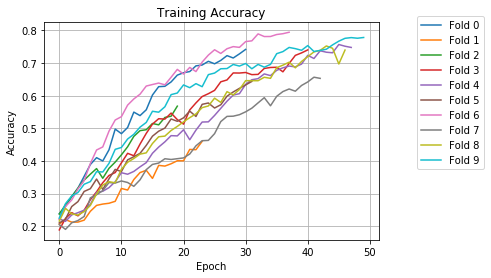

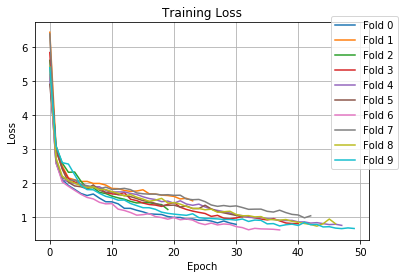

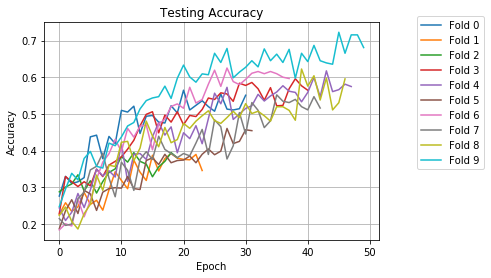

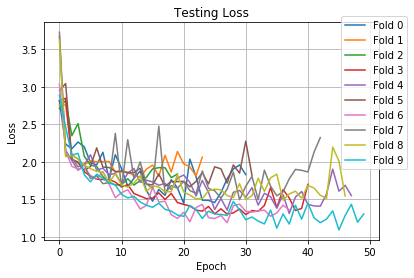

In [16]:
# Visualise loss/accuracy during training and testing separately
import matplotlib.pyplot as plt

for i in range(0,10):
    plt.plot(accuracy_history[i])
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Fold {}'.format(j) for j in range (0,10)], bbox_to_anchor=(1.1, 1.05))
plt.grid()
plt.show()

for i in range(0,10):
    plt.plot(loss_history[i])
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Fold {}'.format(j) for j in range (0,10)], bbox_to_anchor=(1.1, 1.05))
plt.grid()
plt.show()

for i in range(0,10):
    plt.plot(val_accuracy_history[i])
plt.title('Testing Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Fold {}'.format(j) for j in range (0,10)], bbox_to_anchor=(1.1, 1.05))
plt.grid()
plt.show()

for i in range(0,10):
    plt.plot(val_loss_history[i])
plt.title('Testing Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Fold {}'.format(j) for j in range (0,10)], bbox_to_anchor=(1.1, 1.05))
plt.grid()
plt.show()